# Feature engineering with Python


<img src="https://www.python.org/static/img/python-logo.png" alt="yogen" style="width: 200px; float: right;"/>
<br>
<br>
<br>
<img src="../assets/yogen-logo.png" alt="yogen" style="width: 200px; float: right;"/>


## The machine learning pipeline

Machine learning models expect numeric arrays, but data in the real world is in many different forms...


![so we need to go from one to the other!](https://blog.dominodatalab.com/wp-content/uploads/2018/08/Casari-Feature-Eng-Image-2-768x433.png)

From [Feature engineering with Python](https://www.oreilly.com/library/view/feature-engineering-for/9781491953235/)

## Let's play!

We will try to guess a players' position

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
pd.options.display.max_columns = None

In [2]:
df = pd.read_csv('/home/dani/Downloads/players_20.csv', index_col=0)
df.head()

,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
sofifa_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,

https://fifafootballvideogames.fandom.com/wiki/Soccer_positions

So, to begin with, we need to extract a target feature.

In [3]:
starter = df[~df['team_position'].isin(['RES', 'SUB'])] # Discard non-starters

# from the link above
target = starter['team_position'].isin(['DM', 'LW', 'RW', 'LM', 'RM', 'CM', 'AM']).astype(int)
target.value_counts()

0    6304
1    1196
Name: team_position, dtype: int64

In [4]:
starter['team_position'].value_counts()

GK     662
LCB    660
RCB    660
RB     560
LB     560
ST     458
RCM    411
LCM    411
RM     399
LM     398
CAM    311
RDM    244
LDM    242
LS     195
RS     195
CDM    181
LW     162
RW     161
CB     100
CM      76
LWB     58
RWB     58
LAM     23
RAM     23
LF      19
RF      19
CF      14
Name: team_position, dtype: int64

### Do a first approximation to use as baseline

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve


classifier = LogisticRegression()


data = starter.select_dtypes('number').fillna(0)
data.shape

(7500, 60)

In [6]:
## Do first without dropping the eur variables, then compare

data = data.drop(['value_eur', 'wage_eur', 'release_clause_eur'], axis=1)

In [7]:
data.head()

,age,height_cm,weight_kg,overall,potential,international_reputation,weak_foot,skill_moves,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
sofifa_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,32,170,72,94,94,5,4,4,10.0,2021.0,0.0,87.0,92.0,92.0,96.0,39.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
20801,34,187,83,93,93,5,4,5,7.0,2022.0,7.0,90.0,93.0,82.0,89.0,35.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
190871,27,175,68,92,92,5,5,5,10.0,2022.0,10.0,91.0,85.0,87.0,95.0,32.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
200389,26,188,87,91,93,3,3,1,13.0,2023.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
183277,28,175,74,91,91,4,4,4,7.0,2024.0,10.0,91.0,83.0,86.0,94.0,35.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8


In [8]:
X_train, X_test, y_train, y_test = train_test_split(data, target)

X_train.shape, X_test.shape

((5625, 57), (1875, 57))

In [9]:
classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)
probabilities = classifier.predict_proba(X_test)[:, 1]

accuracy_score(y_test, predictions), f1_score(y_test, predictions), roc_auc_score(y_test, probabilities)

/home/dani/anaconda3/envs/master2021/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.8773333333333333, 0.5610687022900763, 0.893791652899888)

In [10]:
probabilities

array([4.05708051e-07, 7.46329932e-05, 4.43687377e-01, ...,
       4.01877442e-01, 2.33905401e-01, 2.80790260e-07])

In [11]:
predictions.sum()

205

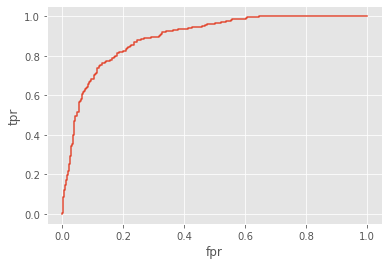

In [12]:
fpr, tpr, threshold = roc_curve(y_test, probabilities)
plt.plot(fpr, tpr)
plt.xlabel('fpr')
plt.ylabel('tpr');

/home/dani/anaconda3/envs/master2021/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.8730666666666667, 0.5592592592592593, 0.8864832102375686)

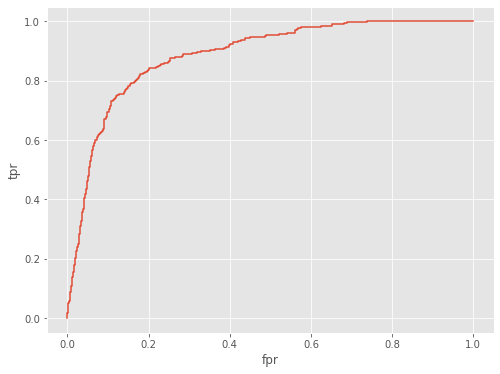

In [13]:
def evaluate(classifier, features, target):
    
    X_train, X_test, y_train, y_test = train_test_split(features, target)
    classifier.fit(X_train, y_train)

    predictions = classifier.predict(X_test)
    probabilities = classifier.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    auc = roc_auc_score(y_test, probabilities)
    fpr, tpr, threshold = roc_curve(y_test, probabilities)
    
    plt.plot(fpr, tpr)
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.gcf().set_size_inches(8, 6)
    
    return acc, f1, auc

evaluate(classifier, data, target)

## Categorical variables

`nationality`, `club`

### One hot

![One Hot Encoding](https://hackernoon.com/photos/4HK5qyMbWfetPhAavzyTZrEb90N2-3o23tie)


In [14]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

encoded = encoder.fit_transform(starter['team_position'].dropna().values.reshape(-1, 1))

encoded.todense()

matrix([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
encoder.categories_

[array(['CAM', 'CB', 'CDM', 'CF', 'CM', 'GK', 'LAM', 'LB', 'LCB', 'LCM',
        'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB', 'RAM', 'RB', 'RCB', 'RCM',
        'RDM', 'RF', 'RM', 'RS', 'RW', 'RWB', 'ST'], dtype=object)]

In [16]:
starter.head()

,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
sofifa_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,

In [17]:
result_encoding = pd.DataFrame(encoded.todense(), index = starter['team_position'].dropna().index, columns = encoder.categories_)
result_encoding.head()

,CAM,CB,CDM,CF,CM,GK,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
sofifa_id,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
20801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
190871,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
200389,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
183277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
starter['team_position'] == 'CAM'

sofifa_id
158023    False
20801     False
190871     True
200389    False
183277    False
          ...  
243084    False
251586    False
247339    False
252584    False
243117    False
Name: team_position, Length: 7500, dtype: bool

This would work okay, but what about nationalities?

In [19]:
encoder.fit_transform(starter['nationality'].dropna().values.reshape(-1,1))

<7500x140 sparse matrix of type '<class 'numpy.float64'>'
	with 7500 stored elements in Compressed Sparse Row format>

In [20]:
starter['nationality'].value_counts()[:10].sum()

3600

In [21]:
frequent_nationalities = starter['nationality'].value_counts()[:10].index.values
frequent_nationalities

array(['England', 'Germany', 'Brazil', 'Spain', 'Argentina', 'France',
       'Italy', 'Colombia', 'Netherlands', 'Norway'], dtype=object)

In [22]:
other_nationalities = starter['nationality'].value_counts()[10:].index.values
categories = frequent_nationalities
categories

array(['England', 'Germany', 'Brazil', 'Spain', 'Argentina', 'France',
       'Italy', 'Colombia', 'Netherlands', 'Norway'], dtype=object)

In [23]:
data = starter.select_dtypes('number')
data = data.drop(['value_eur', 'wage_eur', 'release_clause_eur'], axis=1)
encoder = OneHotEncoder(categories=(categories,), handle_unknown='ignore')

encoder.fit_transform(starter['nationality'].values.reshape(-1,1))

<7500x10 sparse matrix of type '<class 'numpy.float64'>'
	with 3600 stored elements in Compressed Sparse Row format>

### Target encoding

Also known as bin counting


With high cardinality discrete data like user_ids we would be left with many variables by one hot encoding, most of which would not be very informative. There are [several options](https://www.datacamp.com/community/tutorials/encoding-methodologies) to deal with this. The most sophisticated is probably vector encoding, but we can do with a very simple approach: [target encoding](https://maxhalford.github.io/blog/target-encoding/).


In [24]:
target

sofifa_id
158023    1
20801     1
190871    0
200389    0
183277    1
         ..
243084    0
251586    0
247339    0
252584    0
243117    1
Name: team_position, Length: 7500, dtype: int64

In [25]:
starter['nationality']

sofifa_id
158023    Argentina
20801      Portugal
190871       Brazil
200389     Slovenia
183277      Belgium
            ...    
243084     China PR
251586     China PR
247339     Cameroon
252584      England
243117     China PR
Name: nationality, Length: 7500, dtype: object

In [26]:
target.groupby(starter['nationality']).mean()

nationality
Afghanistan          0.000000
Albania              0.055556
Algeria              0.346154
Angola               0.285714
Antigua & Barbuda    0.000000
                       ...   
Uzbekistan           0.000000
Venezuela            0.370370
Wales                0.229167
Zambia               0.333333
Zimbabwe             0.000000
Name: team_position, Length: 140, dtype: float64

In [27]:
percs_midfielder = target.groupby(starter['nationality']).agg(['mean', 'count']).sort_values(by='count', ascending=False)
percs_midfielder.head(10)

,mean,count
nationality,,
England,0.135220,636
Germany,0.159574,470
Brazil,0.142529,435
Spain,0.185542,415
Argentina,0.173697,403
France,0.157480,381
Italy,0.150183,273
Colombia,0.193416,243
Netherlands,0.166667,180


In [28]:
with_percs = starter.merge(percs_midfielder, left_on='nationality', right_index=True)
data['nationality_te'] = with_percs['mean']

In [29]:
data.head()

,age,height_cm,weight_kg,overall,potential,international_reputation,weak_foot,skill_moves,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,nationality_te
sofifa_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,32,170,72,94,94,5,4,4,10.0,2021.0,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,0.173697
20801,34,187,83,93,93,5,4,5,7.0,2022.0,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,0.267974
190871,27,175,68,92,92,5,5,5,10.0,2022.0,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,0.142529
200389,26,188,87,91,93,3,3,1,13.0,2023.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,0.107143
183277,28,175,74,91,91,4,4,4,7.0,2024.0,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,0.210000


In [30]:
redundant = ['nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning']
data_non_redundant = data.drop(redundant, axis = 1)

In [31]:
data_non_redundant.count()<7500

age                           False
height_cm                     False
weight_kg                     False
overall                       False
potential                     False
international_reputation      False
weak_foot                     False
skill_moves                   False
team_jersey_number             True
contract_valid_until           True
attacking_crossing            False
attacking_finishing           False
attacking_heading_accuracy    False
attacking_short_passing       False
attacking_volleys             False
skill_dribbling               False
skill_curve                   False
skill_fk_accuracy             False
skill_long_passing            False
skill_ball_control            False
movement_acceleration         False
movement_sprint_speed         False
movement_agility              False
movement_reactions            False
movement_balance              False
power_shot_power              False
power_jumping                 False
power_stamina               

In [32]:
data_non_redundant = data_non_redundant.fillna(data_non_redundant.median())

/home/dani/anaconda3/envs/master2021/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.8821333333333333, 0.5623762376237624, 0.8969620253164556)

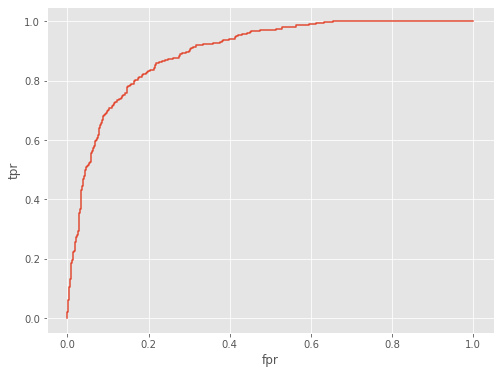

In [33]:
evaluate(classifier, data_non_redundant, target)

## Text

You will learn a lot more in the NLP and Deep Learning sections, but let me show you a few basics.

### The lame approach

`work_rate`

In [34]:
starter['work_rate'].unique()

array(['Medium/Low', 'High/Low', 'High/Medium', 'Medium/Medium',
       'High/High', 'Medium/High', 'Low/High', 'Low/Medium', 'Low/Low'],
      dtype=object)

In [35]:
def rate_to_score(rate):
    
    rates = {'Low' : 1, 'Medium' : 2, 'High': 3 }
    
    return rates.get(rate, 2)
    
    
rate_to_score('High')

3

In [36]:
starter.head(3)

,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
sofifa_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3


In [37]:
split = starter['work_rate'].str.split('/', expand=True)
rates = split.applymap(rate_to_score)
rates.columns = ['attack_work_rate', 'defense_work_rate']
rates

,attack_work_rate,defense_work_rate
sofifa_id,,
158023,2,1
20801,3,1
190871,3,2
200389,2,2
183277,3,2
...,...,...
243084,2,2
251586,2,2
247339,2,3


In [38]:
data_non_redundant.shape

(7500, 45)

In [39]:
with_rates = data_non_redundant.join(rates)
with_rates.shape

(7500, 47)

/home/dani/anaconda3/envs/master2021/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.8810666666666667, 0.551307847082495, 0.9124143246670368)

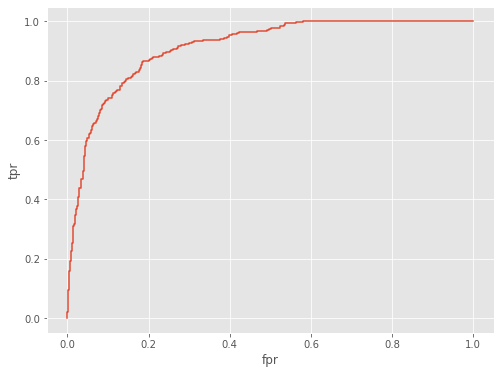

In [40]:
evaluate(classifier, with_rates, target)

### Bag-of-words

`player_traits`

`player_tags`

In [41]:
starter[['player_traits', 'player_tags']]

,player_traits,player_tags
sofifa_id,,
158023,"Beat Offside Trap, Argues with Officials, Earl...","#Dribbler, #Distance Shooter, #Crosser, #FK Sp..."
20801,"Long Throw-in, Selfish, Argues with Officials,...","#Speedster, #Dribbler, #Distance Shooter, #Acr..."
190871,"Power Free-Kick, Injury Free, Selfish, Early C...","#Speedster, #Dribbler, #Playmaker , #Crosser,..."
200389,"Flair, Acrobatic Clearance",NaN
183277,"Beat Offside Trap, Selfish, Finesse Shot, Spee...","#Speedster, #Dribbler, #Acrobat"
...,...,...
243084,NaN,NaN
251586,NaN,NaN
247339,NaN,NaN


### Vector encodings for more than text


## Numerical variables

### Dealing with counts and money

Download https://www.kaggle.com/fernandol/countries-of-the-world

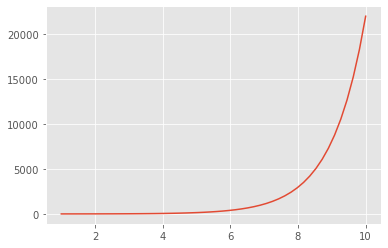

In [42]:
xs = np.linspace(1, 10)

plt.plot(xs, np.exp(xs))

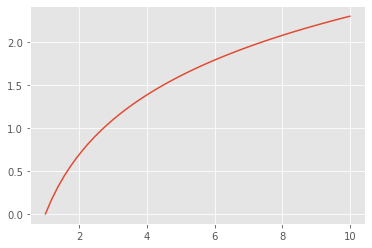

In [43]:
plt.plot(xs, np.log(xs))

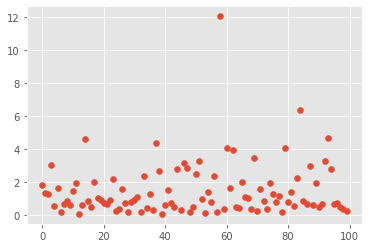

In [44]:
n = 100

exponential = np.exp(np.random.randn(n))

plt.scatter(range(n), exponential)

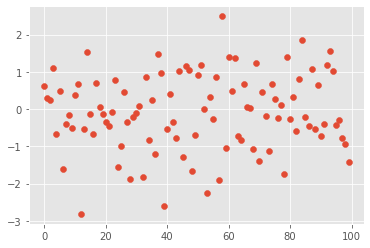

In [45]:
plt.scatter(range(n), np.log(exponential))

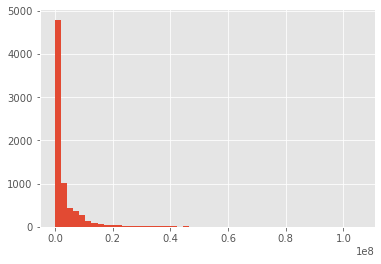

In [46]:
plt.hist(starter['value_eur'], bins = 50);

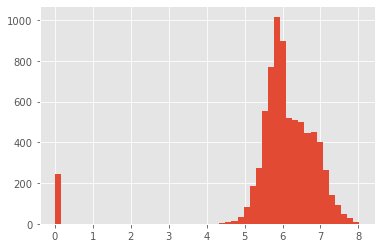

In [47]:
plt.hist(np.log10(starter['value_eur'] + 1), bins = 50);

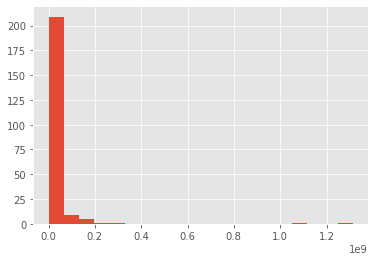

In [48]:
countries = pd.read_csv('/home/dani/Downloads/countries of the world.csv')
plt.hist(countries['Population'], bins=20);

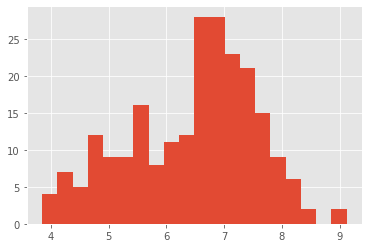

In [49]:
plt.hist(np.log10(countries['Population']), bins=20);

In [50]:
with_rates.shape

(7500, 47)

/home/dani/anaconda3/envs/master2021/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.8816, 0.5714285714285715, 0.902318218087364)

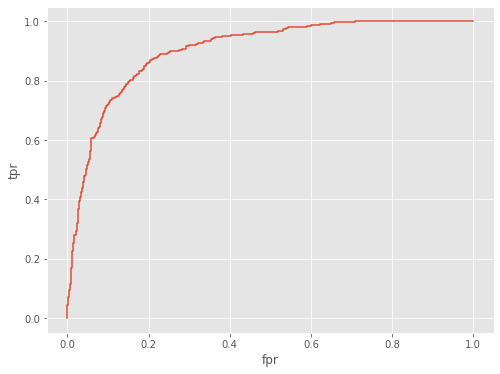

In [51]:
with_rates['log_value'] = np.log1p(starter['value_eur'])
with_rates['log_wage'] = np.log1p(starter['wage_eur'])
with_rates['log_release_clause'] = np.log1p(starter['release_clause_eur']).fillna(0.0)

evaluate(classifier, with_rates, target)

### Scaling

Compare `age`, `height_cm`, `weight_kg` with the skill variables. What if we applied a KNN or a PCA?

In [52]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

MinMaxScaler().fit_transform(np.array([2,3,6,7,4]).reshape(-1,1))

array([[0. ],
       [0.2],
       [0.8],
       [1. ],
       [0.4]])

In [53]:
StandardScaler().fit_transform(np.array([2,3,6,7,4]).reshape(-1,1))

array([[-1.29399328],
       [-0.75482941],
       [ 0.86266219],
       [ 1.40182605],
       [-0.21566555]])

(0.8874666666666666, 0.6056074766355141, 0.9103770996297813)

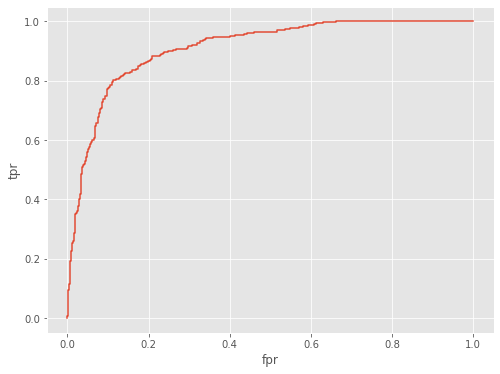

In [54]:
standardized_data = StandardScaler().fit_transform(with_rates)

evaluate(classifier, standardized_data, target)

(0.8725333333333334, 0.5614678899082569, 0.8433975636085975)

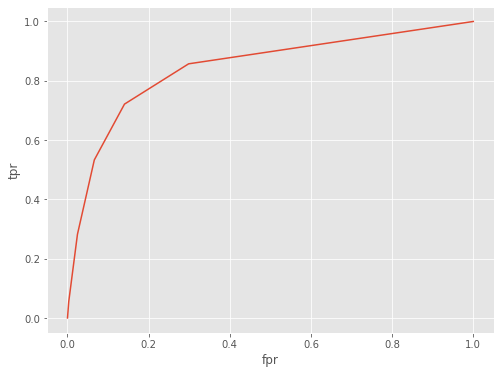

In [55]:
from sklearn.neighbors import KNeighborsClassifier

evaluate(KNeighborsClassifier(), with_rates, target)

(0.8762666666666666, 0.5245901639344261, 0.8383799814896713)

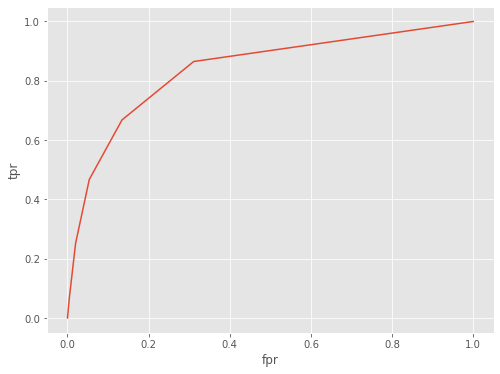

In [56]:
evaluate(KNeighborsClassifier(), standardized_data, target)

(0.8864, 0.5765407554671967, 0.9074508358738986)

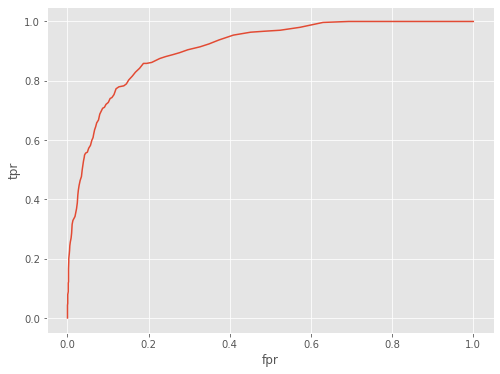

In [57]:
from sklearn.ensemble import RandomForestClassifier

evaluate(RandomForestClassifier(), standardized_data, target)

### Interaction features

Very useful for linear models. Decision models already have them for free.

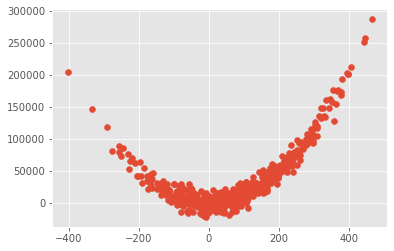

In [58]:
npoints = 500

xs = (np.random.randn(npoints) * 150 + 75)
noise = np.random.randn(npoints) * 1e4
ys = 1.3 * xs ** 2 + noise

plt.scatter(xs, ys);

A linear model will do a terrible job fitting data that has nonlinearities: logs, multiplications, etc.

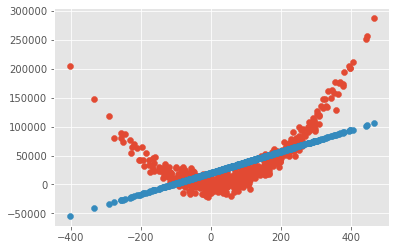

In [59]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(xs.reshape(-1,1), ys)

predictions = lr.predict(xs.reshape(-1,1)) # It's a terrible fit

plt.scatter(xs, ys)
plt.scatter(xs, predictions)

We can give it a hand by adding nonlinear features:

In [60]:
xs2 = xs ** 2

polynomial_features = np.concatenate([xs.reshape(-1,1), xs2.reshape(-1,1)], axis=1)
polynomial_features.shape

(500, 2)

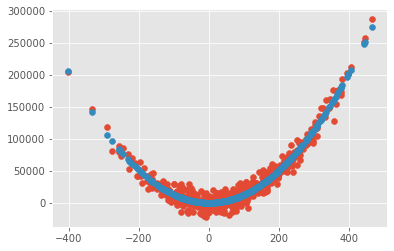

In [61]:
lr.fit(polynomial_features, ys)

predictions = lr.predict(polynomial_features)

plt.scatter(polynomial_features[:,0], ys)
plt.scatter(polynomial_features[:,0], predictions)

In sklearn:

In [62]:
from sklearn.preprocessing import PolynomialFeatures

## Putting it all together with `sklearn` Pipelines 

For:

1. Convenience

2. Joint parameter selection

In [63]:
starter.head()

,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
sofifa_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,

In [64]:
starter.columns.to_list().index('goalkeeping_reflexes')

76

In [65]:
starter = df[~df['team_position'].isin(['RES', 'SUB'])] # Discard non-starters

# from the link above
target = starter['team_position'].isin(['DM', 'LW', 'RW', 'LM', 'RM', 'CM', 'AM']).astype(int)
data = starter[starter.columns[3:76]].drop('team_position', axis=1)
data.head()

,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning
sofifa_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14
20801,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14
190871,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15
200389,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90
183277,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",7.0,NaN,2019-07-01,2024.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8


In [66]:
X_train, X_test, y_train, y_test = train_test_split(data, target)


In [67]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion # Mention but we don't use it
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer # https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
import sklearn
sklearn.set_config(display='diagram')


number_columns = data.select_dtypes('number').columns
string_columns =  data.select_dtypes('object').columns

string_preproc = Pipeline([('string_imputer', SimpleImputer(strategy='most_frequent')),
                           ('onehotter', OneHotEncoder(handle_unknown='ignore'))])

number_preproc = Pipeline([('number_imputer', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())])


ct = ColumnTransformer([('string_preproc', string_preproc, string_columns),
                        ('number_preproc', number_preproc, number_columns)])

pipeline = Pipeline(steps = [('preproc', ct),
                             ('rf', RandomForestClassifier())])

pipeline

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('string_preproc',
                                                  Pipeline(steps=[('string_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotter',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['dob', 'nationality', 'club', 'player_positions', 'preferred_foot',
       'work_rate', 'body_type', 'real_face', 'player_tags', 'loaned_from',
       'joined',...
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning'],
      dtype='object'))])),
                ('rf', RandomForestClassifier())])

In [68]:
%%time
pipeline.fit(X_train, y_train)

CPU times: user 2.33 s, sys: 824 µs, total: 2.34 s
Wall time: 2.33 s


Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('string_preproc',
                                                  Pipeline(steps=[('string_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotter',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['dob', 'nationality', 'club', 'player_positions', 'preferred_foot',
       'work_rate', 'body_type', 'real_face', 'player_tags', 'loaned_from',
       'joined',...
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning'],
      dtype='object'))])),
                ('rf', RandomForestClassifier())])

### And now the magic

https://scikit-learn.org/stable/modules/model_evaluation.html

In [69]:
%%time

from sklearn.model_selection import GridSearchCV

hyperparameters_to_explore = {'rf__n_estimators' : [10, 100, 300],
                              'rf__max_depth' : [None, 5, 10],
                              'rf__min_samples_split' : [2, 10],
                              'rf__min_samples_leaf' : [1, 5]}

gs = GridSearchCV(pipeline, 
                  hyperparameters_to_explore,
                  scoring='f1',
                  n_jobs=4)

gs.fit(X_train, y_train)

CPU times: user 9.92 s, sys: 259 ms, total: 10.2 s
Wall time: 1min 16s


GridSearchCV(estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(transformers=[('string_preproc',
                                                                         Pipeline(steps=[('string_imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotter',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['dob', 'nationality', 'club', 'player_positions', 'preferred_foot',
       'work_rate', 'body_type', 'real_face', 'player_tags',...
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning'],
      dtype='object'))])),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=4,
             param_grid={'rf__max_depth': [None, 5, 10],
                         'rf__min_samples_leaf': [1, 5],
                         'rf__min_samples_split': [2, 10],
                         'rf__n_estimators': [10, 100, 300]},
             scoring='f1')

In [70]:
gs.best_params_

{'rf__max_depth': None,
 'rf__min_samples_leaf': 1,
 'rf__min_samples_split': 2,
 'rf__n_estimators': 300}

(0.8864, 0.5379609544468547, 0.9388024322374524)

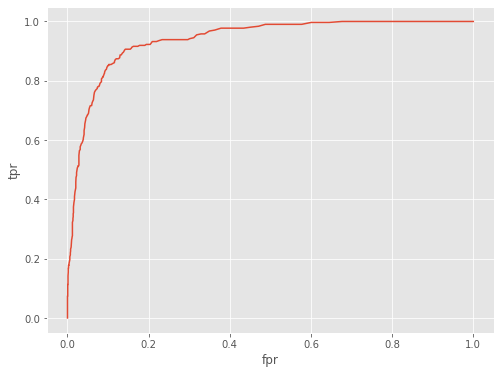

In [71]:
predictions = gs.predict(X_test)
probabilities = gs.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
auc = roc_auc_score(y_test, probabilities)
fpr, tpr, threshold = roc_curve(y_test, probabilities)

plt.plot(fpr, tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.gcf().set_size_inches(8, 6)

acc, f1, auc

### Target encoding in `sklearn` pipelines

There is no target encoder estimator in sklearn. We can install an additional library or, even more fun, roll our own!

This is how you install the additional library:

```bash
!conda install -c conda-forge category_encoders
```

Then:

In [72]:
from category_encoders import TargetEncoder

## Further reading


[Feature Engineering for Machine Learning](https://www.oreilly.com/library/view/feature-engineering-for/9781491953235): a great book covering all the basics.

[Why is feature scaling required?](https://medium.com/@rahul77349/feature-scaling-why-it-is-required-8a93df1af310)

[When to standardize?](https://statmodeling.stat.columbia.edu/2009/07/11/when_to_standar/)

[Representing Categorical Data with Target Encoding](https://brendanhasz.github.io/2019/03/04/target-encoding)


[A Simple Guide to Scikit-learn Pipelines](https://medium.com/vickdata/a-simple-guide-to-scikit-learn-pipelines-4ac0d974bdcf)

[scikit-learn for developers](https://scikit-learn.org/stable/developers/develop.html)

[The Categorical Encoders library](https://contrib.scikit-learn.org/category_encoders/)

[Creating your own estimator in scikit-learn](http://danielhnyk.cz/creating-your-own-estimator-scikit-learn/)